In [1]:
# script designed to plot elevation bed and gnd profile
# BST 03MAY2020
# python

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys,os
import pandas as pd
%matplotlib inline

In [2]:
# functions

def euclid_dist(xarray, yarray,zarray):
    dist = np.zeros_like(xarray)
    dist[1:] = np.cumsum(np.sqrt(np.diff(xarray) ** 2.0 + np.diff(yarray) ** 2.0 + np.diff(zarray) ** 2.0))
    return dist

In [3]:
# constants
c = 299792458               # Speed of light at STP
v_ice =c/np.sqrt(3.15)

In [5]:
in_dir = "/mnt/d/MARS/orig/supl/gis/shapefiles/malaspina/radar/picks/"
# file
fname = in_dir + "2018mala_picks.csv"
# open data file
dat = pd.read_csv(fname,delimiter=",",index_col=None)
dat

,track,trace,lon,lat,alt,gndElev,srfIdx,srfTwtt,srfAmp,subsrfIdx,subsrfTwtt,subsrfAmp,subsrfElev,thick
0,20180817-222930,0,-140.988586,59.942341,612.197815,260.464935,0.0,0.000002,0.000000,0.0,NaN,0.0,NaN,NaN
1,20180817-222930,1,-140.988541,59.942348,612.336792,260.252686,0.0,0.000002,0.000000,0.0,NaN,0.0,NaN,NaN
2,20180817-222930,2,-140.988495,59.942356,612.473572,260.047119,0.0,0.000002,0.000000,0.0,NaN,0.0,NaN,NaN
3,20180817-222930,3,-140.988449,59.942364,612.607178,259.810486,0.0,0.000002,0.000000,0.0,NaN,0.0,NaN,NaN
4,20180817-222930,4,-140.988388,59.942371,612.739624,259.499268,0.0,0.000002,0.000000,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86539,20180819-215243,22617,-141.220140,59.965150,1414.775000,42.052604,963.0,0.000010,44.189095,NaN,NaN,NaN,NaN,NaN
86540,20180819-215243,22618,-141.220180,59.965153,1414.798600,42.076163,963.0,0.000010,46.290901,NaN,NaN,NaN,NaN,NaN
86541,20180819-215243,22619,-141.220230,59.965157,1414.822000,42.099601,963.0,0.000010,45.593006,NaN,NaN,NaN,NaN,NaN
86542,20180819-215243,22620,-141.220280,59.965164,1414.845100,42.122672,963.0,0.000010,47.638611,NaN,NaN,NaN,NaN,NaN


In [6]:
# split up dataframes per track
tracks = np.unique(dat["track"])
print(tracks)

['20180817-222930' '20180818-000438' '20180819-215243']


In [7]:
# get subset dataframe for each track
d0 = dat[dat["track"] == tracks[1]]
d0 = d0.sort_values(by=['trace'])
d0 = d0.reset_index()

d1 = dat[dat["track"] == tracks[2]]
d1 = d1.sort_values(by=['trace'])
d1 = d1.reset_index()
d1 = d1.sort_index(ascending=False)     # flip index to go west-east

d2 = dat[dat["track"] == tracks[0]]
d2 = d2.sort_values(by=['trace'])
d2 = d2.reset_index()

In [8]:
# calculate cumulative euclidian distances
dist0 = np.zeros(d0.shape[0])
for _i in range(len(dist0)):
    if _i>=1:
        dist0[_i] = dist0[_i-1] + np.sqrt((d0["lon"].iloc[_i] - d0["lon"].iloc[_i-1])**2 + (d0["lat"].iloc[_i] - d0["lat"].iloc[_i-1])**2)
        
dist0 = dist0*100     # convert to km

dist1 = np.zeros(d1.shape[0])
for _i in range(len(dist1)):
    if _i>=1:
        dist1[_i] = dist1[_i-1] + np.sqrt((d1["lon"].iloc[_i] - d1["lon"].iloc[_i-1])**2 + (d1["lat"].iloc[_i] - d1["lat"].iloc[_i-1])**2)
        
dist1 = dist1*100     # convert to km

dist2 = np.zeros(d2.shape[0])
for _i in range(len(dist2)):
    if _i>=1:
        dist2[_i] = dist2[_i-1] + np.sqrt((d2["lon"].iloc[_i] - d2["lon"].iloc[_i-1])**2 + (d2["lat"].iloc[_i] - d2["lat"].iloc[_i-1])**2)
        
dist2 = dist2*100     # convert to km

print(dist0[-1],dist1[-1],dist2[-1])

134.92429824556268 115.13082850270986 87.74928829516979


In [9]:
# traces where tracks overlap
trace000438_0 = 14168 # 20180818-000438 0th crossing
trace215243_0 = 9167 # 20180819-215243

trace000438_1 = 16881 # 20180818-000438 1st crossing
trace222930_0 = 10100 # 20180817-222930

# get first and last pick indices for each file
idx0=np.where(~np.isnan(d0["thick"]))[0]
idx0=[idx0[0],idx0[-1]]

idx1=np.where(~np.isnan(d1["thick"]))[0]
idx1=[idx1[0],idx1[-1]]

idx2=np.where(~np.isnan(d2["thick"]))[0]
idx2=[idx2[0],idx2[-1]]

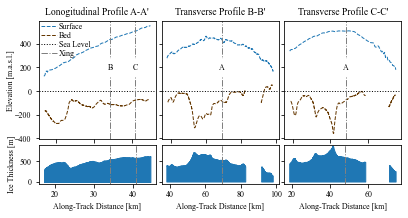

In [28]:
# plot
mpl.rcParams["font.size"] = 8
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams['lines.linewidth'] = 1

fig, ax = plt.subplots(2,3,gridspec_kw={'height_ratios': [3, 1]}, figsize=[6.5, 3])

# elevation subplots
ax[0,0].plot(dist0[idx0[0]-100:idx0[-1]+100], d0["gndElev"].iloc[idx0[0]-100:idx0[-1]+100],color="C0",linestyle="--",label="Surface")
ax[0,0].plot(dist0[idx0[0]-100:idx0[-1]+100], d0["subsrfElev"].iloc[idx0[0]-100:idx0[-1]+100],color="xkcd:brown",linestyle="--",label="Bed")
ax[0,0].axhline(y=0,c="black",linestyle=":",label="Sea Level")
ax[0,0].axvline(x=dist0[trace000438_0],c="grey",linestyle="-.",label="Xing")
ax[0,0].axvline(x=dist0[trace000438_1],c="grey",linestyle="-.")
ax[0,0].set_xticklabels([])
ax[0,0].set_ylabel("Elevation [m.a.s.l.]",labelpad=0)
leg = ax[0,0].legend(loc="upper left",fancybox=True, framealpha=0, ncol=1, handletextpad=0.25, labelspacing=.125, borderpad=0, borderaxespad=.25)
ax[0,0].set_title("Lonogitudinal Profile A-A'")
ax[0,0].text(x=dist0[trace000438_0], y=200, s="B", rotation=0, ha='center', va='center', backgroundcolor='white')
ax[0,0].text(x=dist0[trace000438_1], y=200, s="C", rotation=0, ha='center', va='center', backgroundcolor='white')

ax[0,1].plot(dist1[idx1[0]-100:idx1[-1]+100], d1["gndElev"].iloc[idx1[0]-100:idx1[-1]+100],color="C0",linestyle="--",label="surface")
ax[0,1].plot(dist1[idx1[0]-100:idx1[-1]+100], d1["subsrfElev"].iloc[idx1[0]-100:idx1[-1]+100],color="xkcd:brown",linestyle="--",label="bed")
ax[0,1].axhline(y=0,c="black",linestyle=":")
ax[0,1].axvline(x=dist1[d1.shape[0] - trace215243_0],c="grey",linestyle="-.")
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,1].set_title("Transverse Profile B-B'")
ax[0,1].text(x=dist1[d1.shape[0] - trace215243_0], y=200, s="A", rotation=0, ha='center', va='center', backgroundcolor='white')

ax[0,2].plot(dist2[idx2[0]-100:idx2[-1]+100], d2["gndElev"].iloc[idx2[0]-100:idx2[-1]+100],color="C0",linestyle="--",label="surface")
ax[0,2].plot(dist2[idx2[0]-100:idx2[-1]+100], d2["subsrfElev"].iloc[idx2[0]-100:idx2[-1]+100],color="xkcd:brown",linestyle="--",label="bed")
ax[0,2].axhline(y=0,c="black",linestyle=":")
ax[0,2].axvline(x=dist2[trace222930_0],c="grey",linestyle="-.")
ax[0,2].set_xticklabels([])
ax[0,2].set_yticklabels([])
ax[0,2].set_title("Transverse Profile C-C'")
ax[0,2].text(x=dist2[trace222930_0], y=200, s="A", rotation=0, ha='center', va='center', backgroundcolor='white')

# set legend font
plt.setp(leg.texts, family='Times New Roman')

# set axes limits
ylim=[ax[0,2].get_ylim()[0],ax[0,0].get_ylim()[1]]
ax[0,0].set_ylim(ylim)
ax[0,1].set_ylim(ylim)
ax[0,2].set_ylim(ylim)

# ice thickness subplots
ax[1,0].fill_between(dist0[idx0[0]-100:idx0[-1]+100],d0["thick"].iloc[idx0[0]-100:idx0[-1]+100],color="C0")
ax[1,0].axvline(x=dist0[trace000438_0],c="grey",linestyle="-.")
ax[1,0].axvline(x=dist0[trace000438_1],c="grey",linestyle="-.")
ax[1,0].set_xlabel("Along-Track Distance [km]")
ax[1,0].set_ylabel("Ice Thickness [m]")

ax[1,1].fill_between(dist1[idx1[0]-100:idx1[-1]+100],d1["thick"].iloc[idx1[0]-100:idx1[-1]+100],color="C0")
ax[1,1].axvline(x=dist1[d1.shape[0] - trace215243_0],c="grey",linestyle="-.")
ax[1,1].set_xlabel("Along-Track Distance [km]")
ax[1,1].set_yticklabels([])

ax[1,2].fill_between(dist2[idx2[0]-100:idx2[-1]+100],d2["thick"].iloc[idx2[0]-100:idx2[-1]+100],color="C0")
ax[1,2].axvline(x=dist2[trace222930_0],c="grey",linestyle="-.")
ax[1,2].set_xlabel("Along-Track Distance [km]")
ax[1,2].set_yticklabels([])

# set axes limits
ylim=ax[1,2].get_ylim()
ax[1,0].set_ylim(ylim)
ax[1,1].set_ylim(ylim)

plt.subplots_adjust(wspace=.05, hspace=.075)
# fig.tight_layout()
plt.show()

In [29]:
# save fig
fig.savefig("/mnt/c/Users/btobers/Documents/pres/mala/figs/paper/v2/2018_malaspina_crossing.png",dpi=500,bbox_inches='tight')

In [12]:
print(d0["thick"].min(),d0["thick"].max())
print(d1["thick"].min(),d1["thick"].max())
print(d2["thick"].min(),d2["thick"].max())

print(d0["elev_bed"].min(),d0["elev_bed"].max())
print(d1["elev_bed"].min(),d1["elev_bed"].max())
print(d2["elev_bed"].min(),d2["elev_bed"].max())

304.3377453221084 624.9768570350286
135.9757009922981 706.9047312456742
237.23447869341928 864.1570326230792


KeyError: 'elev_bed'

In [ ]:
in_dir = "/media/btober/beefmaster/work/malaspina/data/radar/"
os.listdir(in_dir)

In [ ]:
fname = in_dir + "20180819-215243_pk.csv"
dat = pd.read_csv(fname,delimiter=",",index_col=False)
dat

In [ ]:
dat = dat.sort_values(by=['trace'])
dat = dat.reset_index()
dat
# caluclulate along track dist
dist = np.zeros(dat.shape[0])
for _i in range(len(dist)):
    if _i>=1:
        dist[_i] = dist[_i-1] + np.sqrt((dat["lon"].iloc[_i] - dat["lon"].iloc[_i-1])**2 + (dat["lat"].iloc[_i] - dat["lat"].iloc[_i-1])**2)
        
dist = dist*1000     # convert to km

In [ ]:
# xyzcrs = "+proj=geocent +a=6378140 +b=6356750 +no_defs"
# navcrs = "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"

# dat"x"], dat["y"], dat["z"] = pyproj.transform(
#     navcrs,
#     xyzsys,
#     dat["lon"].to_numpy(),
#     dat["lat"].to_numpy(),
#     dat["elev"].to_numpy(),
# )

# dat["dist"] = euclid_dist(
#     dat["x"].to_numpy(),
#     dat["y"].to_numpy(),
#     dat["z"].to_numpy())

In [ ]:
plt.plot(dist)

In [ ]:

# get deepest trough index
idx = dat["subsrfElev"].idxmin()
print(idx)

# plot power dB of surface and subsurface
dBsrf = 20*np.log10(dat["srfAmp"])
dBsrf.plot()
dBssrf = 20*np.log10(dat["subsrfAmp"])
dBssrf.plot()
plt.axvline(x=idx)
plt.legend()

In [ ]:
# plot power dB of \subsurface in relation to surface return
dBssrf = 20*np.log10(dat["subsrfAmp"]/dat["srfAmp"])
plt.plot(dBssrf,".")
plt.axvline(x=idx)

In [ ]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=dBssrf, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('power [dB]')
plt.ylabel('Frequency')
plt.title('Malaspina relative subsurface power')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)